# **Finding Correlation**


## Objectives
- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [3]:
# Load the dataset from the given URL
#file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
file_path = "survey_data.csv"
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 114 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    ResponseId                      int64  
 1    MainBranch                      object 
 2    Age                             object 
 3    Employment                      object 
 4    RemoteWork                      object 
 5    Check                           object 
 6    CodingActivities                object 
 7    EdLevel                         object 
 8    LearnCode                       object 
 9    LearnCodeOnline                 object 
 10   TechDoc                         object 
 11   YearsCode                       object 
 12   YearsCodePro                    object 
 13   DevType                         object 
 14   OrgSize                         object 
 15   PurchaseInfluence               object 
 16   BuyNewTool                      object 
 17   BuildvsBuy

<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


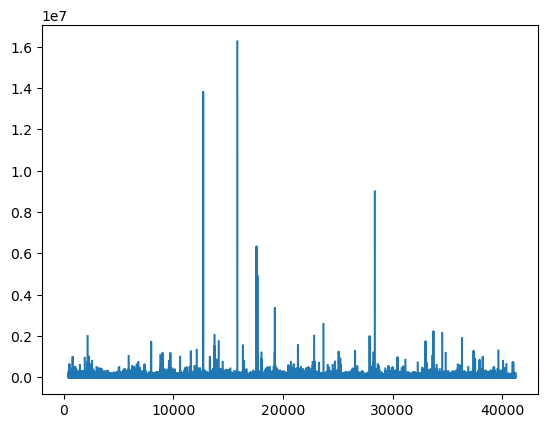

In [4]:
plt.plot(df['ConvertedCompYearly'])

(array([2.3418e+04, 1.1000e+01, 1.0000e+00, 2.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.00000000e+00, 1.62566120e+06, 3.25132140e+06, 4.87698160e+06,
        6.50264180e+06, 8.12830200e+06, 9.75396220e+06, 1.13796224e+07,
        1.30052826e+07, 1.46309428e+07, 1.62566030e+07]),
 <BarContainer object of 10 artists>)

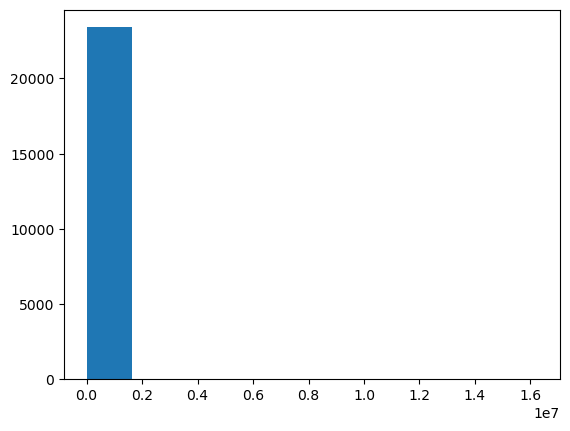

In [5]:
plt.hist(df['ConvertedCompYearly'])

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [11]:
fulltime = df[df['Employment'] == 'Employed, full-time']

In [13]:
fulltime['ConvertedCompYearly'].median()

69814.0

<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.

In [28]:
# Remove NaN values in ConvertedCompYearly
df_cleaned = df.dropna(subset=['ConvertedCompYearly', 'Country'])

In [29]:
# Compute IQR (Interquartile Range) for outlier filtering
Q1 = df_cleaned['ConvertedCompYearly'].quantile(0.25)
Q3 = df_cleaned['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Select top 10 countries by respondent count
top_countries = df_cleaned['Country'].value_counts().head(10).index
df_top_countries = df_cleaned[df_cleaned['Country'].isin(top_countries)]

C:\Users\alvia\AppData\Local\Temp\ipykernel_21076\2249247172.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_countries, x='Country', y='ConvertedCompYearly', palette='coolwarm')


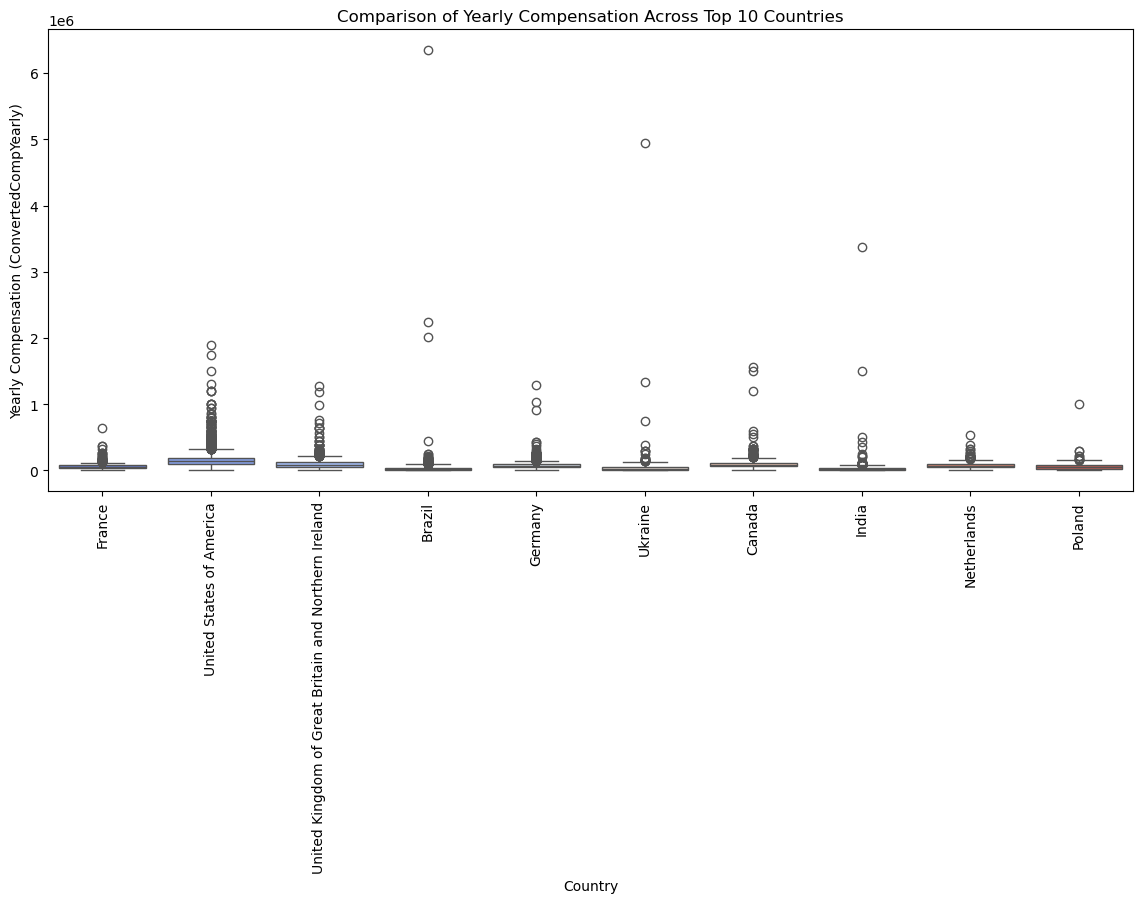

In [30]:
# Create box plot
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_top_countries, x='Country', y='ConvertedCompYearly', palette='coolwarm')

# Formatting
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Yearly Compensation (ConvertedCompYearly)')
plt.title('Comparison of Yearly Compensation Across Top 10 Countries')

# Show plot
plt.show()

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [31]:
# Remove outliers
df_filtered = df_cleaned[(df_cleaned['ConvertedCompYearly'] >= lower_bound) & (df_cleaned['ConvertedCompYearly'] <= upper_bound)]

In [33]:
df_top_countries = df_filtered[df_filtered['Country'].isin(top_countries)]

C:\Users\alvia\AppData\Local\Temp\ipykernel_21076\2249247172.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_countries, x='Country', y='ConvertedCompYearly', palette='coolwarm')


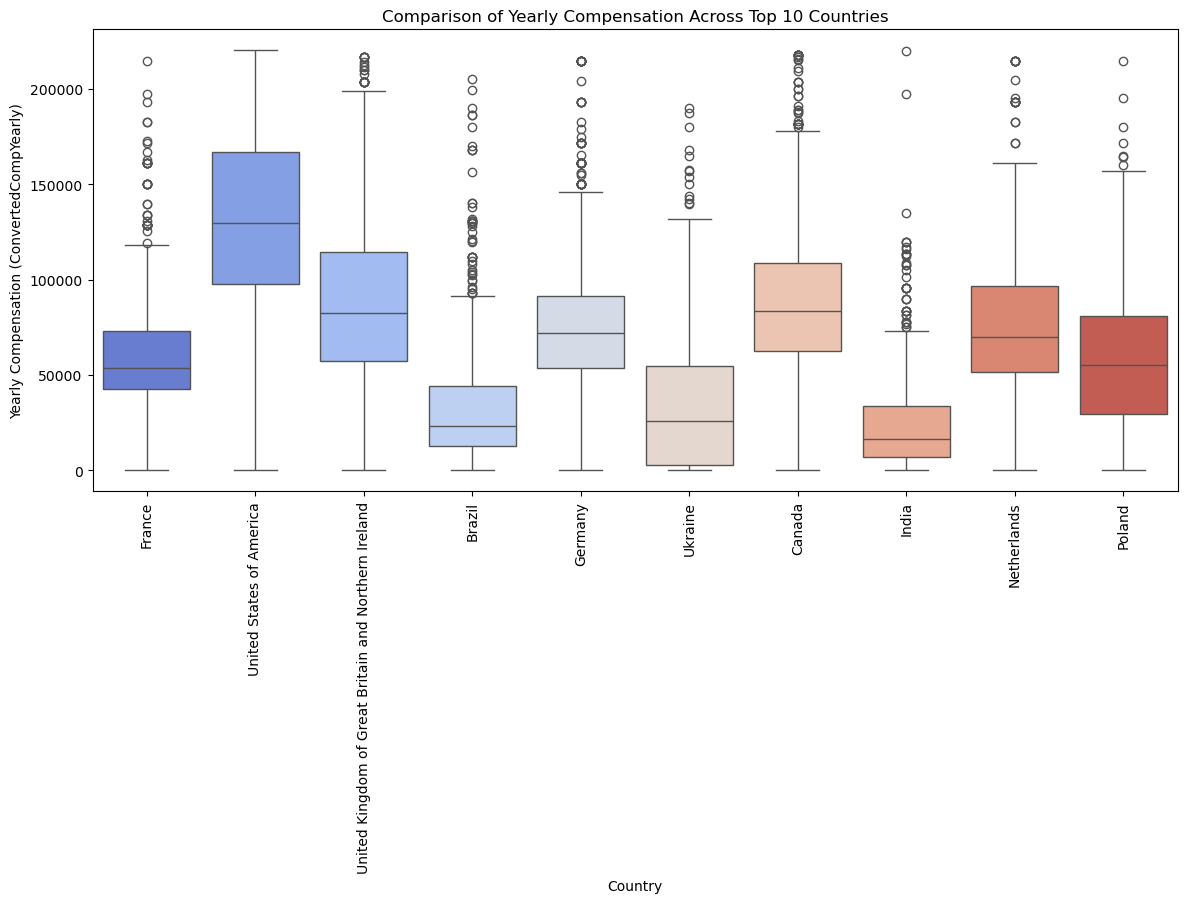

In [34]:
# Create box plot
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_top_countries, x='Country', y='ConvertedCompYearly', palette='coolwarm')

# Formatting
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Yearly Compensation (ConvertedCompYearly)')
plt.title('Comparison of Yearly Compensation Across Top 10 Countries')

# Show plot
plt.show()

<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


In [36]:
correlation_matrix = df[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].corr()
correlation_matrix.head()

,ConvertedCompYearly,WorkExp,JobSatPoints_1
ConvertedCompYearly,1.000000,0.154114,0.020306
WorkExp,0.154114,1.000000,-0.026490
JobSatPoints_1,0.020306,-0.026490,1.000000


<Axes: >

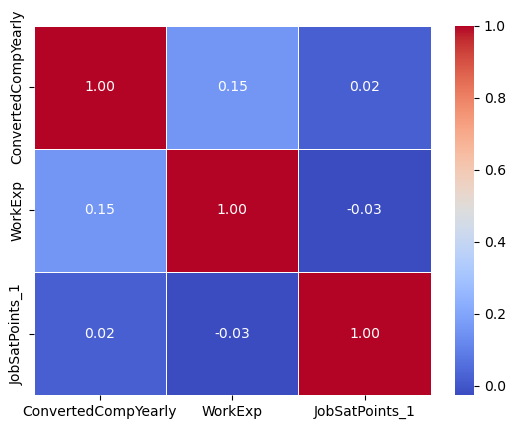

In [37]:
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


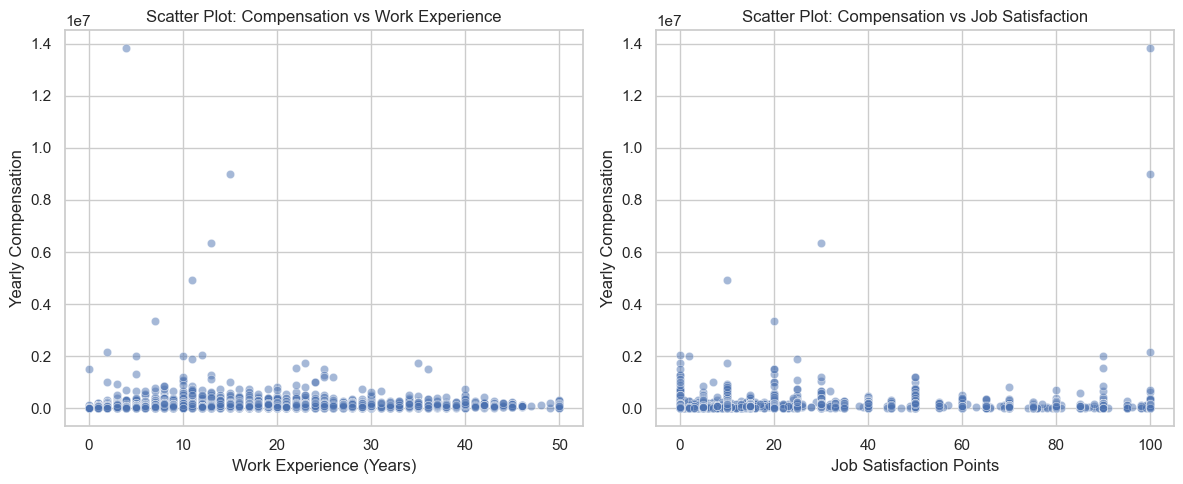

In [38]:
# Set plot style
sns.set(style="whitegrid")

# Scatter plot: ConvertedCompYearly vs WorkExp
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['WorkExp'], y=df['ConvertedCompYearly'], alpha=0.5)
plt.xlabel("Work Experience (Years)")
plt.ylabel("Yearly Compensation")
plt.title("Scatter Plot: Compensation vs Work Experience")

# Scatter plot: ConvertedCompYearly vs JobSatPoints_1
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['JobSatPoints_1'], y=df['ConvertedCompYearly'], alpha=0.5)
plt.xlabel("Job Satisfaction Points")
plt.ylabel("Yearly Compensation")
plt.title("Scatter Plot: Compensation vs Job Satisfaction")

# Show the plots
plt.tight_layout()
plt.show()


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


In [39]:
cross_tab = pd.crosstab(df['Employment'], df['EdLevel'], margins=True)
cross_tab.head()

EdLevel,"Associate degree (A.A., A.S., etc.)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Primary/elementary school,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",Some college/university study without earning a degree,Something else,All
Employment,,,,,,,,,
"Employed, full-time",1059,16806,11011,160,2073,1460,3579,377,36525
"Employed, full-time;Employed, part-time",9,90,61,1,8,9,15,3,196
"Employed, full-time;Independent contractor, freelancer, or self-employed",104,1381,963,25,159,181,492,41,3346
"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time",11,79,45,1,10,6,14,2,168
"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time;Retired",0,0,0,0,1,0,0,0,1


<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
